In [2]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

No of images in training set: 835
No of images in validation set: 104
No of images in test set: 105
No of images in feeder set: 15079
Labels: ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
Labels (feeder): ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']


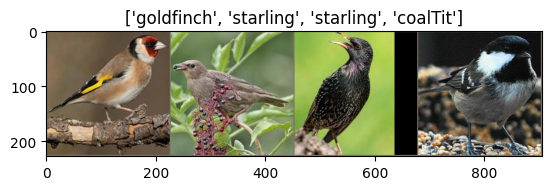

In [3]:
%run setup.ipynb 

# Training with augmentation

Now we've trained our model and assessed its performance on the feeder data... it's not the worst, but let's see if we can't make it a bit stronger by adding augmentations.

## Augmentation round 1

First, just gonna mess up the pictures a little - no sciency arguments for it other than intuitively trying to capture that the feeder images are more grainy and the birds are not always perfectly posed (hence the crop).

In [15]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=8, shuffle=True, num_workers=4)

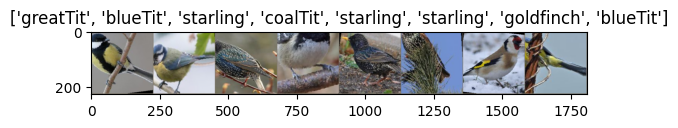

In [16]:
# looking at the augmentations..
inputs, classes = next(iter(dataloader_train_aug1))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_labels[x] for x in classes])

Load in a fresh ResNet50 that's prepped for transfer learning

In [17]:
# load "clean" resnet50
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug1) # FIXME does this change?

### Training
First with the frozen layers, then unfreeze for finetuning

In [18]:
freezetrained_model_aug1, _ = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

Epoch 1/24
----------
Train Loss: 1.8033 Acc: 0.4108
Val Loss: 1.6300 Acc: 0.7019
Epoch time 1m 10s
----------

Epoch 2/24
----------
Train Loss: 1.4999 Acc: 0.6778
Val Loss: 1.3714 Acc: 0.7885
Epoch time 1m 10s
----------

Epoch 3/24
----------
Train Loss: 1.3076 Acc: 0.7653
Val Loss: 1.1739 Acc: 0.8846
Epoch time 1m 9s
----------

Epoch 4/24
----------
Train Loss: 1.1459 Acc: 0.7964
Val Loss: 1.0803 Acc: 0.8846
Epoch time 1m 9s
----------

Epoch 5/24
----------
Train Loss: 1.0323 Acc: 0.8228
Val Loss: 0.9426 Acc: 0.8462
Epoch time 1m 9s
----------

Epoch 6/24
----------
Train Loss: 0.9405 Acc: 0.8335
Val Loss: 0.8172 Acc: 0.9135
Epoch time 1m 9s
----------

Epoch 7/24
----------
Train Loss: 0.8984 Acc: 0.8144
Val Loss: 0.7806 Acc: 0.9135
Epoch time 1m 10s
----------

Epoch 8/24
----------
Train Loss: 0.8414 Acc: 0.8299
Val Loss: 0.7865 Acc: 0.9519
Epoch time 1m 9s
----------

Epoch 9/24
----------
Train Loss: 0.7924 Acc: 0.8443
Val Loss: 0.6883 Acc: 0.9423
Epoch time 1m 19s
---------

In [19]:
unfreeze_layers(freezetrained_model_aug1)
model_aug1, model_aug1_info = train_model(model=freezetrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

Epoch 1/24
----------


Train Loss: 0.4511 Acc: 0.8683
Val Loss: 0.1657 Acc: 0.9904
Epoch time 1m 58s
----------

Epoch 2/24
----------
Train Loss: 0.3065 Acc: 0.9126
Val Loss: 0.1295 Acc: 0.9904
Epoch time 1m 59s
----------

Epoch 3/24
----------
Train Loss: 0.2042 Acc: 0.9473
Val Loss: 0.0960 Acc: 0.9808
Epoch time 2m 2s
----------

Epoch 4/24
----------
Train Loss: 0.1851 Acc: 0.9401
Val Loss: 0.0719 Acc: 0.9904
Epoch time 2m 0s
----------

Epoch 5/24
----------
Train Loss: 0.1614 Acc: 0.9473
Val Loss: 0.0510 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 6/24
----------
Train Loss: 0.1416 Acc: 0.9617
Val Loss: 0.0537 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 7/24
----------
Train Loss: 0.1268 Acc: 0.9629
Val Loss: 0.0466 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 8/24
----------
Train Loss: 0.1160 Acc: 0.9605
Val Loss: 0.0545 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 9/24
----------
Train Loss: 0.1101 Acc: 0.9689
Val Loss: 0.0440 Acc: 0.9904
Epoch time 1m 50s
----------

Epoch 10/24
----

### Round 1 results

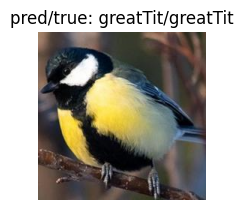

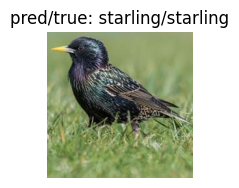

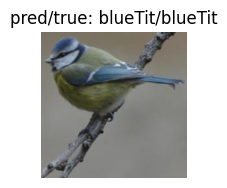

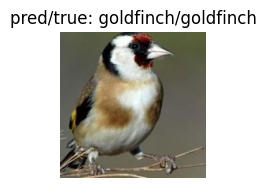

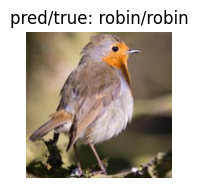

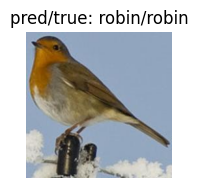

In [20]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

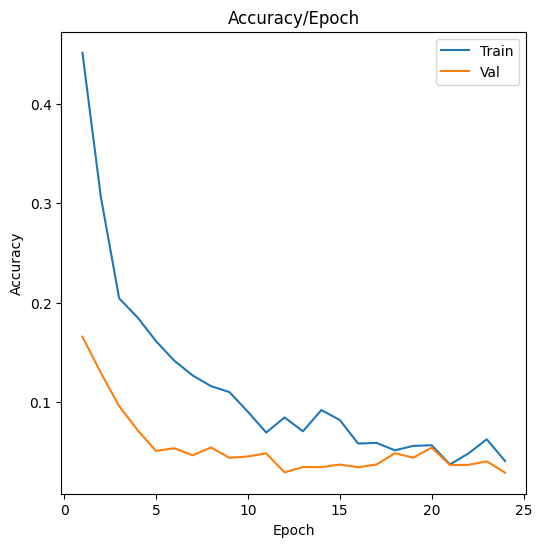

In [21]:
plot_accuracies(model_aug1_info["train_loss"], model_aug1_info["val_loss"], ["Train", "Val"])

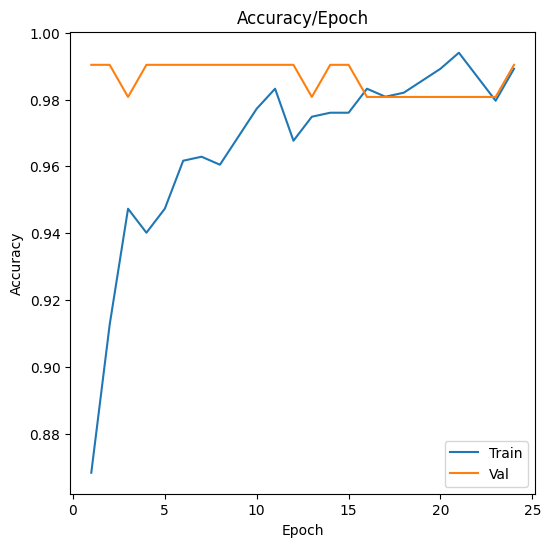

In [22]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 1  0 14  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  1  0 14  0  0]
 [ 0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 97.14285714285714


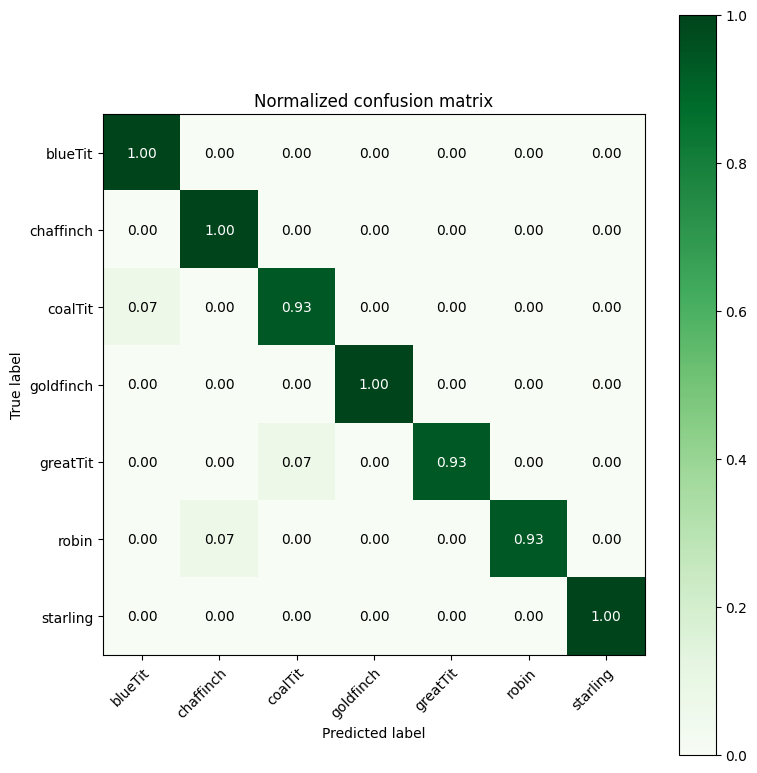

In [23]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


In [24]:
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       0.94      1.00      0.97        15
   chaffinch       0.94      1.00      0.97        15
     coalTit       0.93      0.93      0.93        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.93      0.97        15
       robin       1.00      0.93      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



## Augmentation Round 2

Add blur and colorjitter

In [4]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1), # Added
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug2 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation2)
dataloader_train_aug2 = torch.utils.data.DataLoader(dataset_train_aug2, batch_size=8, shuffle=True, num_workers=4)

In [5]:
# load "clean" resnet50
untrained_model_aug2 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug2) 


In [ ]:
freezetrained_model_aug2, _ = train_model(model=untrained_model_aug2, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug2) 

Epoch 1/24
----------
Train Loss: 1.8436 Acc: 0.3257
Val Loss: 1.7999 Acc: 0.3654
Epoch time 1m 36s
----------

Epoch 2/24
----------
Train Loss: 1.5984 Acc: 0.5689
Val Loss: 1.6536 Acc: 0.5288
Epoch time 1m 35s
----------

Epoch 3/24
----------
Train Loss: 1.4057 Acc: 0.6695
Val Loss: 1.5540 Acc: 0.5865
Epoch time 1m 37s
----------

Epoch 4/24
----------
Train Loss: 1.2636 Acc: 0.7114
Val Loss: 1.4937 Acc: 0.5385
Epoch time 1m 37s
----------

Epoch 5/24
----------
Train Loss: 1.1795 Acc: 0.7246
Val Loss: 1.4152 Acc: 0.6731
Epoch time 1m 36s
----------

Epoch 6/24
----------
Train Loss: 1.0797 Acc: 0.7521
Val Loss: 1.3758 Acc: 0.6250
Epoch time 1m 31s
----------

Epoch 7/24
----------
Train Loss: 1.0599 Acc: 0.7473
Val Loss: 1.3435 Acc: 0.6250
Epoch time 1m 37s
----------

Epoch 8/24
----------
Train Loss: 0.9896 Acc: 0.7641
Val Loss: 1.2851 Acc: 0.6538
Epoch time 1m 32s
----------

Epoch 9/24
----------
Train Loss: 0.9605 Acc: 0.7629
Val Loss: 1.2651 Acc: 0.6827
Epoch time 1m 33s
----

python(38974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38975) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38976) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38977) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Val Loss: 1.0474 Acc: 0.7308
Epoch time 1m 30s
----------

Epoch 24/24
----------


python(39024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
unfreeze_layers(freezetrained_model_aug2)
model_aug2, model_aug2_info = train_model(model=freezetrained_model_aug2, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug2)

Epoch 1/24
----------
Train Loss: 0.5239 Acc: 0.8802
Val Loss: 0.4196 Acc: 0.9519
Epoch time 1m 8s
----------

Epoch 2/24
----------
Train Loss: 0.5051 Acc: 0.8754
Val Loss: 0.4232 Acc: 0.9519
Epoch time 12m 52s
----------

Epoch 3/24
----------
Train Loss: 0.4941 Acc: 0.8970
Val Loss: 0.3963 Acc: 0.9519
Epoch time 1m 9s
----------

Epoch 4/24
----------
Train Loss: 0.4691 Acc: 0.8982
Val Loss: 0.4159 Acc: 0.9519
Epoch time 1m 9s
----------

Epoch 5/24
----------
Train Loss: 0.4749 Acc: 0.8958
Val Loss: 0.3785 Acc: 0.9712
Epoch time 1m 9s
----------

Epoch 6/24
----------
Train Loss: 0.4698 Acc: 0.9006
Val Loss: 0.4000 Acc: 0.9712
Epoch time 1m 9s
----------

Epoch 7/24
----------
Train Loss: 0.4677 Acc: 0.8946
Val Loss: 0.3910 Acc: 0.9615
Epoch time 1m 9s
----------

Epoch 8/24
----------
Train Loss: 0.4618 Acc: 0.8934
Val Loss: 0.3731 Acc: 0.9423
Epoch time 1m 9s
----------

Epoch 9/24
----------
Train Loss: 0.4430 Acc: 0.8862
Val Loss: 0.3761 Acc: 0.9519
Epoch time 1m 9s
----------


## Round 2 Results

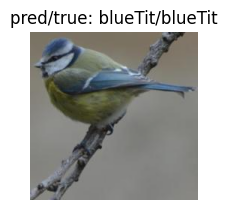

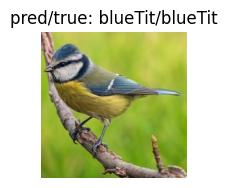

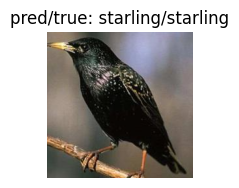

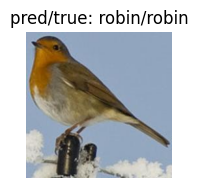

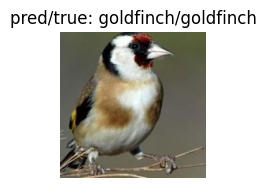

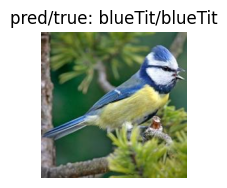

In [ ]:
visualize_model(model_aug2, dataloader_tiny_val, class_labels, device)

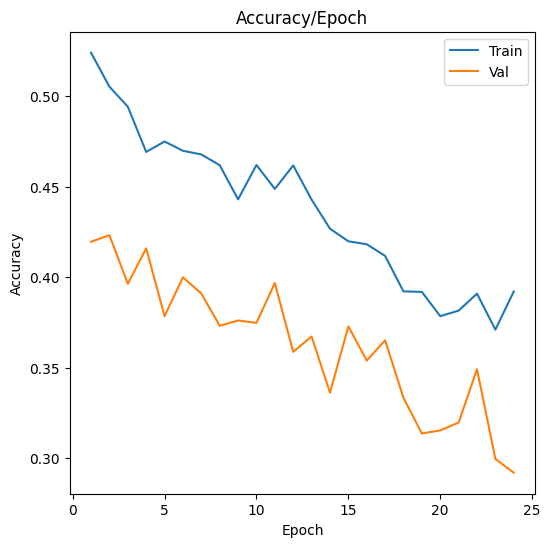

In [ ]:
plot_accuracies(model_aug2_info["train_loss"], model_aug2_info["val_loss"], ["Train", "Val"])

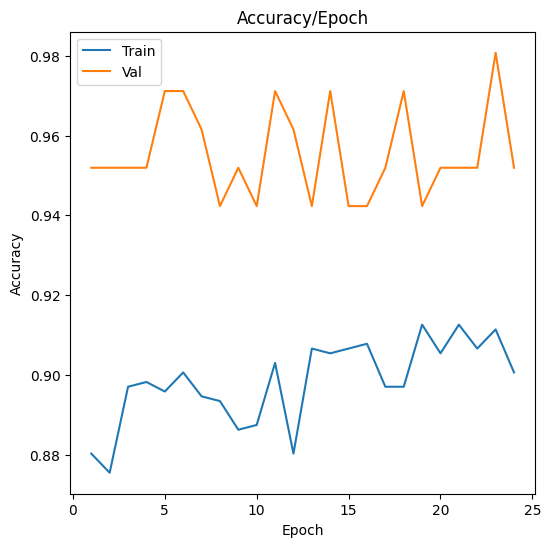

In [ ]:
plot_accuracies(model_aug2_info["train_acc"], model_aug2_info["val_acc"], ["Train", "Val"])

[[14  0  0  0  1  0  0]
 [ 0 15  0  0  0  0  0]
 [ 1  0 14  0  0  0  0]
 [ 0  1  0 14  0  0  0]
 [ 0  0  1  0 14  0  0]
 [ 0  2  0  0  0 13  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 94.28571428571428


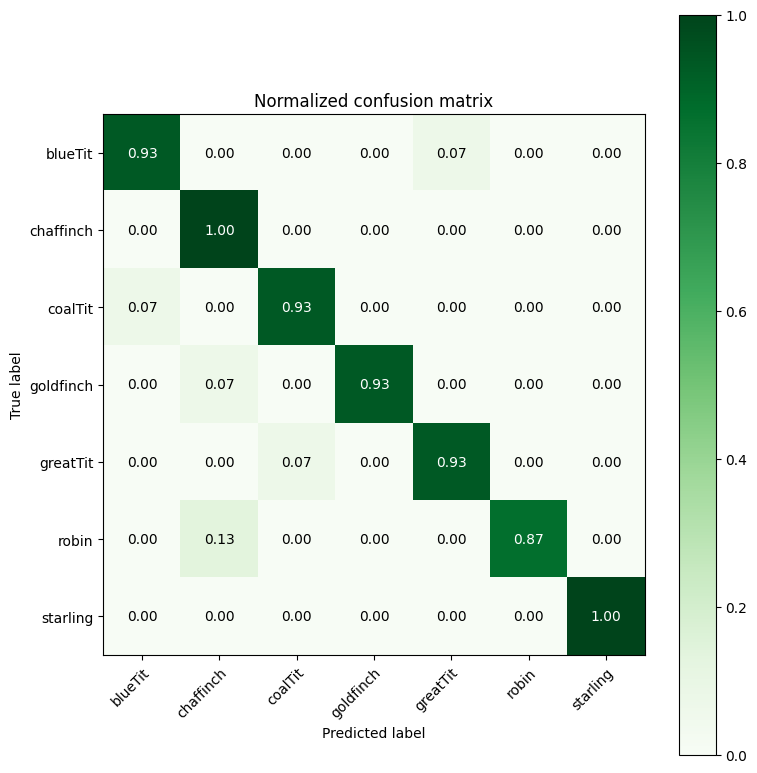

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       0.93      0.93      0.93        15
   chaffinch       0.83      1.00      0.91        15
     coalTit       0.93      0.93      0.93        15
   goldfinch       1.00      0.93      0.97        15
    greatTit       0.93      0.93      0.93        15
       robin       1.00      0.87      0.93        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.94       105
   macro avg       0.95      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



## Augmentation round 3

Try without jitter

In [ ]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation3 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug3 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation3)
dataloader_train_aug3 = torch.utils.data.DataLoader(dataset_train_aug3, batch_size=8, shuffle=True, num_workers=4)

In [ ]:
# load "clean" resnet50
untrained_model_aug3 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug3) 

In [ ]:
freezetrained_model_aug3, _ = train_model(model=untrained_model_aug3, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug3) 

In [ ]:
unfreeze_layers(freezetrained_model_aug3)
model_aug3, model_aug3_info = train_model(model=freezetrained_model_aug3, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug3)

## Round 3 Results

In [ ]:
visualize_model(model_aug3, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug3_info["train_loss"], model_aug3_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug3_info["train_acc"], model_aug3_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))